In [ ]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['GTM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [ ]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('GTM', axis=1, level=0).copy()
print(df.shape)
df.head()


Fetching data...
(25, 36)


economy           GTM                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                                                                            
2000         5.977577   10.064976    7.002615   20.195034           17.835387   
2001         7.285874   11.038672   10.219568   28.663548           19.977045   
2002         8.132631   12.073596    9.820933   26.726277           20.887909   
2003         5.603477   11.858396    9.752416   26.181100           20.621507   
2004         7.578622   11.742850    8.906631   27.419410           21.189606   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      28.950554  3.703379e+10          3165.932375          9.079868   
2001      42.005485  3.789763e+10          3166.203513          5.018181   
2002      40.378535  3.935262e+10          3213.268374          5.610750   
2003      40.821239  4.036020e+10          3222.154683          4.400567   
2004      42.795463  4.162667e+10          3250.204060          4.167946   

economy                  ...         WLD                                  \
series  Labor_Part_Rate  ... Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
Year                     ...                                               
2000             62.996  ...   15.999621   23.465314           24.462487   
2001             62.992  ...   16.382130   22.870610           23.695335   
2002             63.055  ...   16.782459   23.116728           23.026378   
2003             63.070  ...   17.036216   23.862095           23.203246   
2004             63.112  ...   16.884092   25.722670           23.912776   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
Year                                                                       
2000      23.412644  4.842569e+13          7858.907966         23.953361   
2001      22.913313  4.941287e+13          7912.245893         23.070254   
2002      22.930455  5.055484e+13          7989.628892         22.700953   
2003      23.686598  5.211892e+13          8131.193084         22.795603   
2004      25.471904  5.446523e+13          8388.597338         23.698974   

economy                                                      
series  Labor_Part_Rate Labor_Force_Total Unemployment_Rate  
Year                                                         
2000          64.511769      2.765727e+09          6.123041  
2001          64.304147      2.809257e+09          6.202248  
2002          64.114659      2.853895e+09          6.428257  
2003          63.977476      2.900596e+09          6.495525  
2004          63.895015      2.950148e+09          6.337627  

[5 rows x 36 columns]

In [ ]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

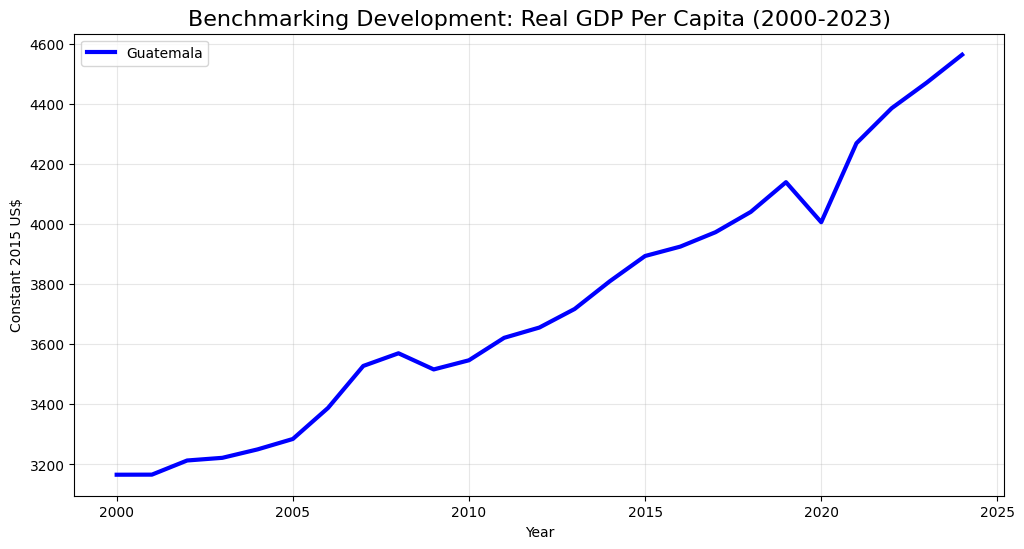

In [ ]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

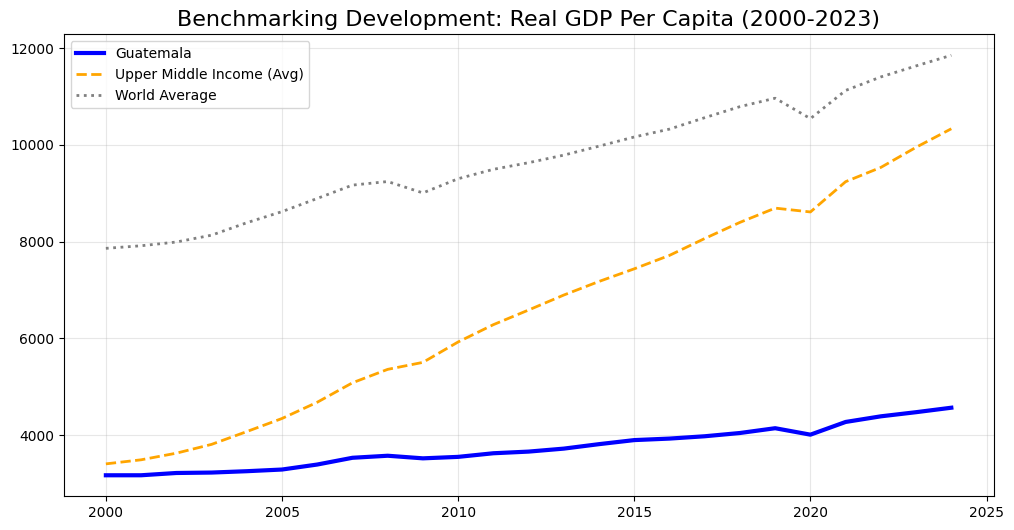

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

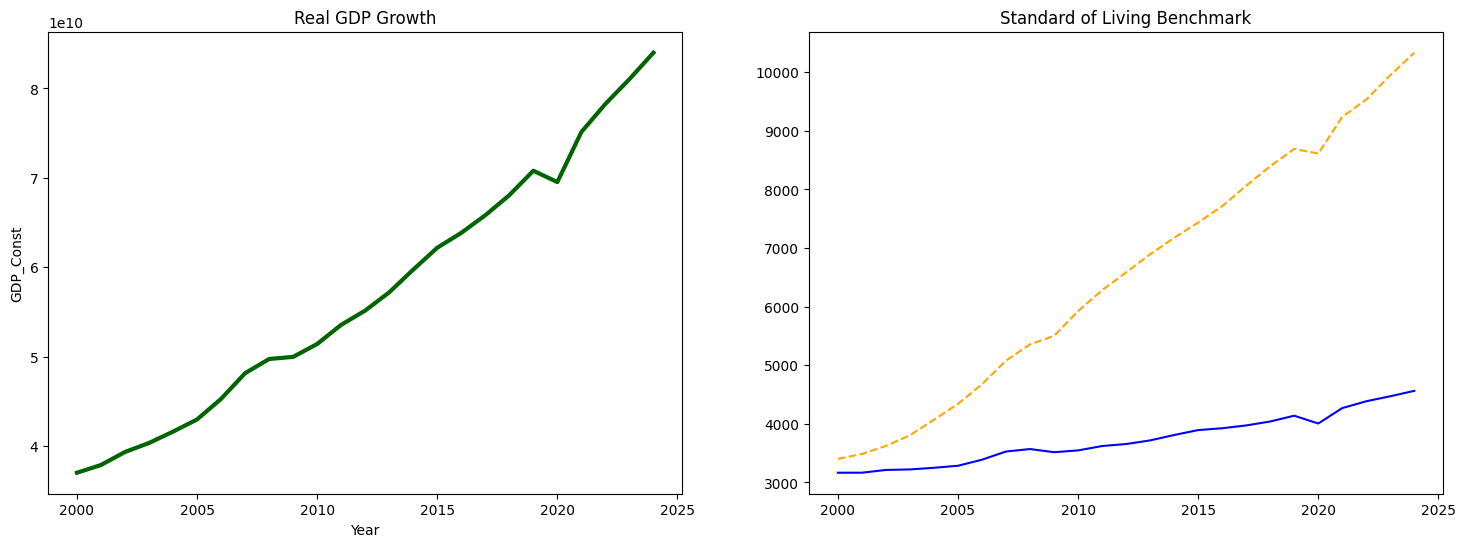

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

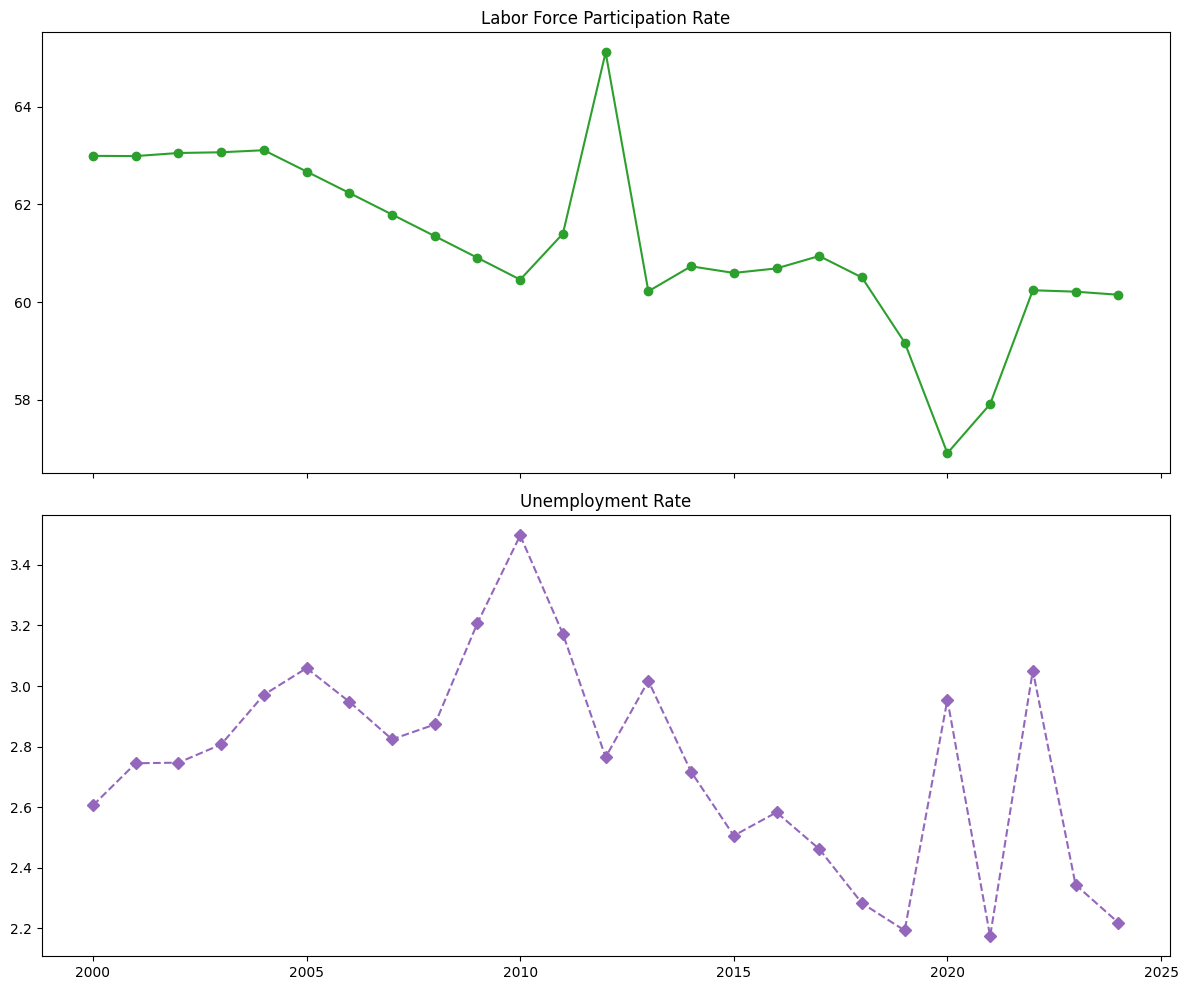

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

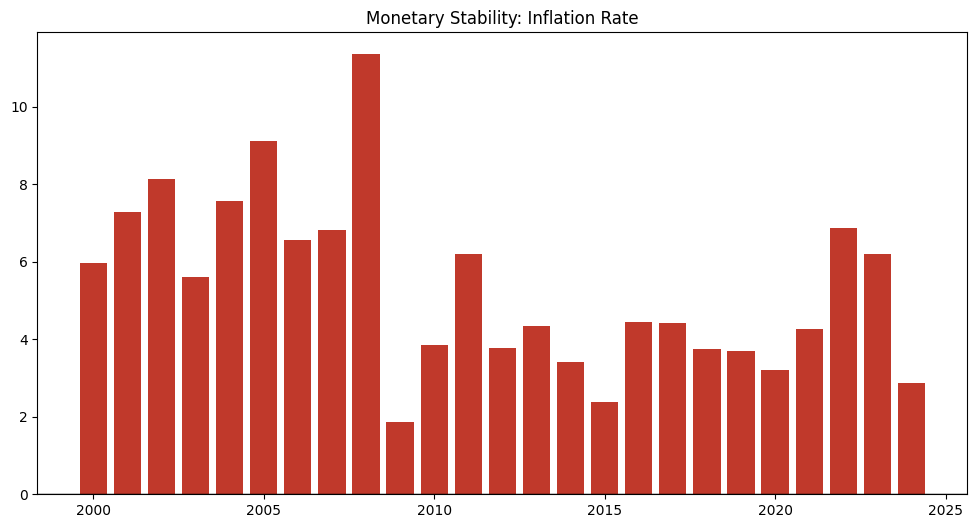

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

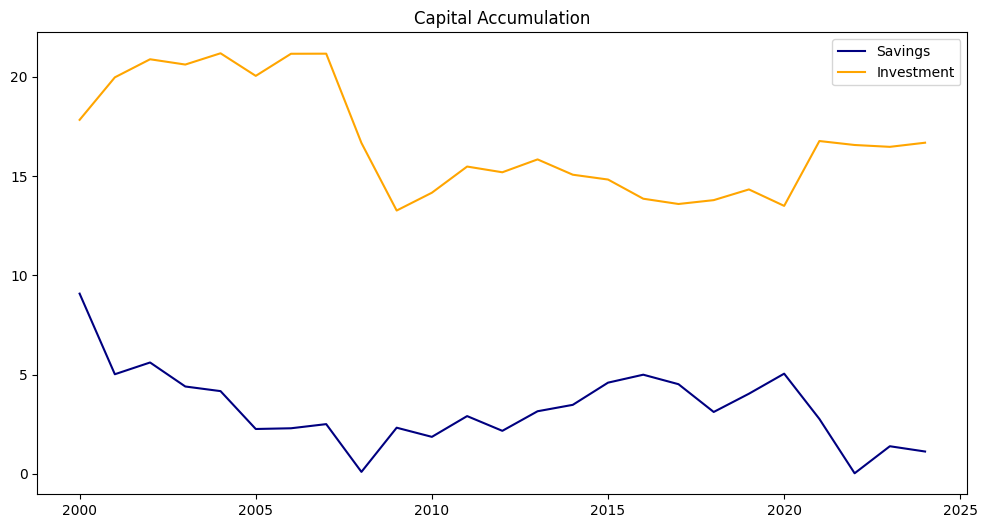

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

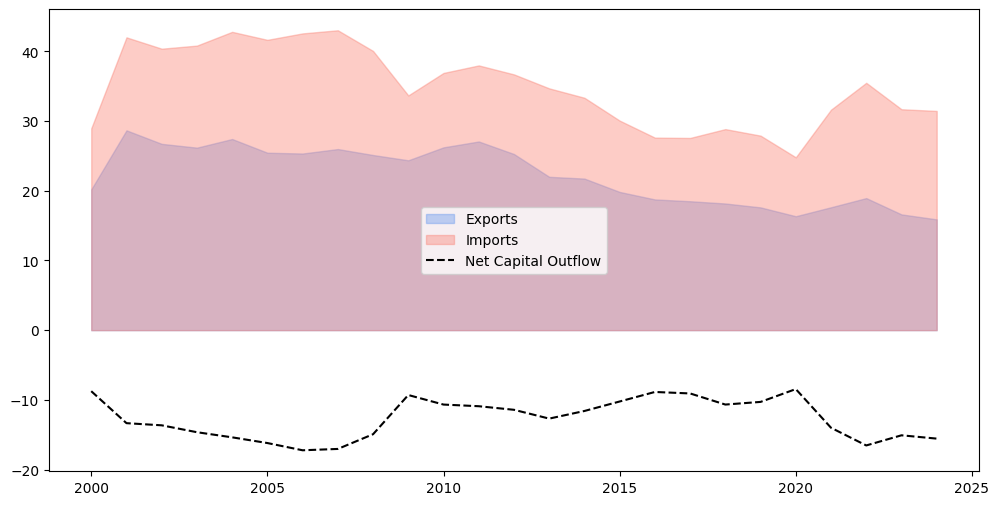

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

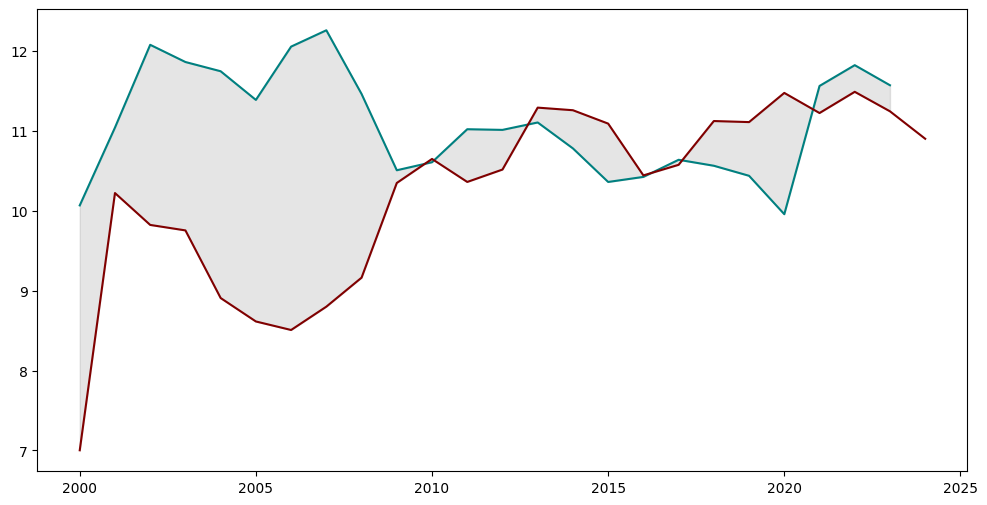

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

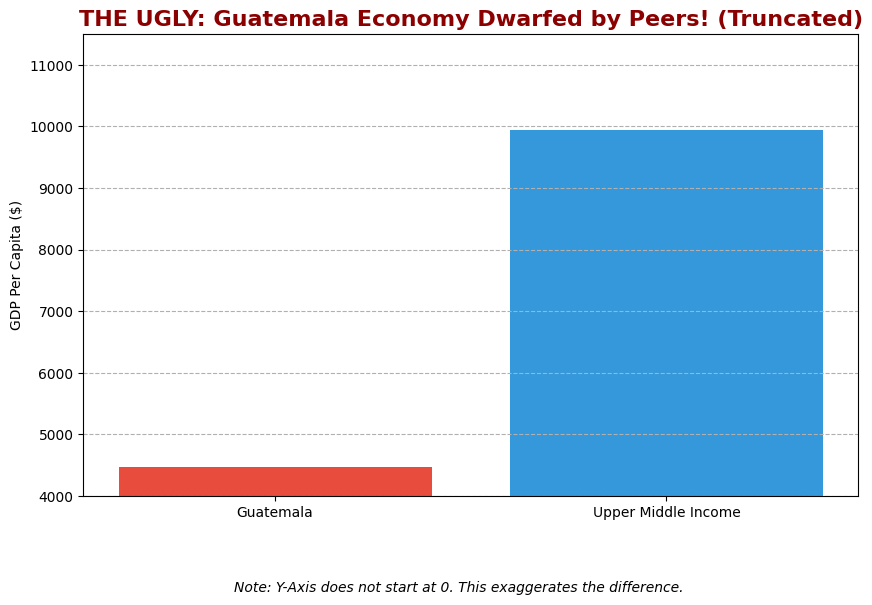

In [ ]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
gtm_val = df.loc[snapshot_year, ('GTM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

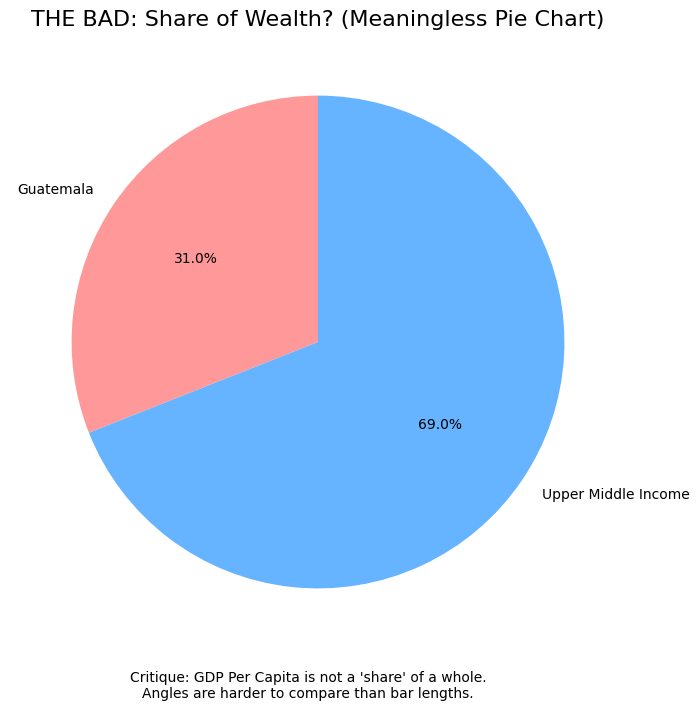

In [ ]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

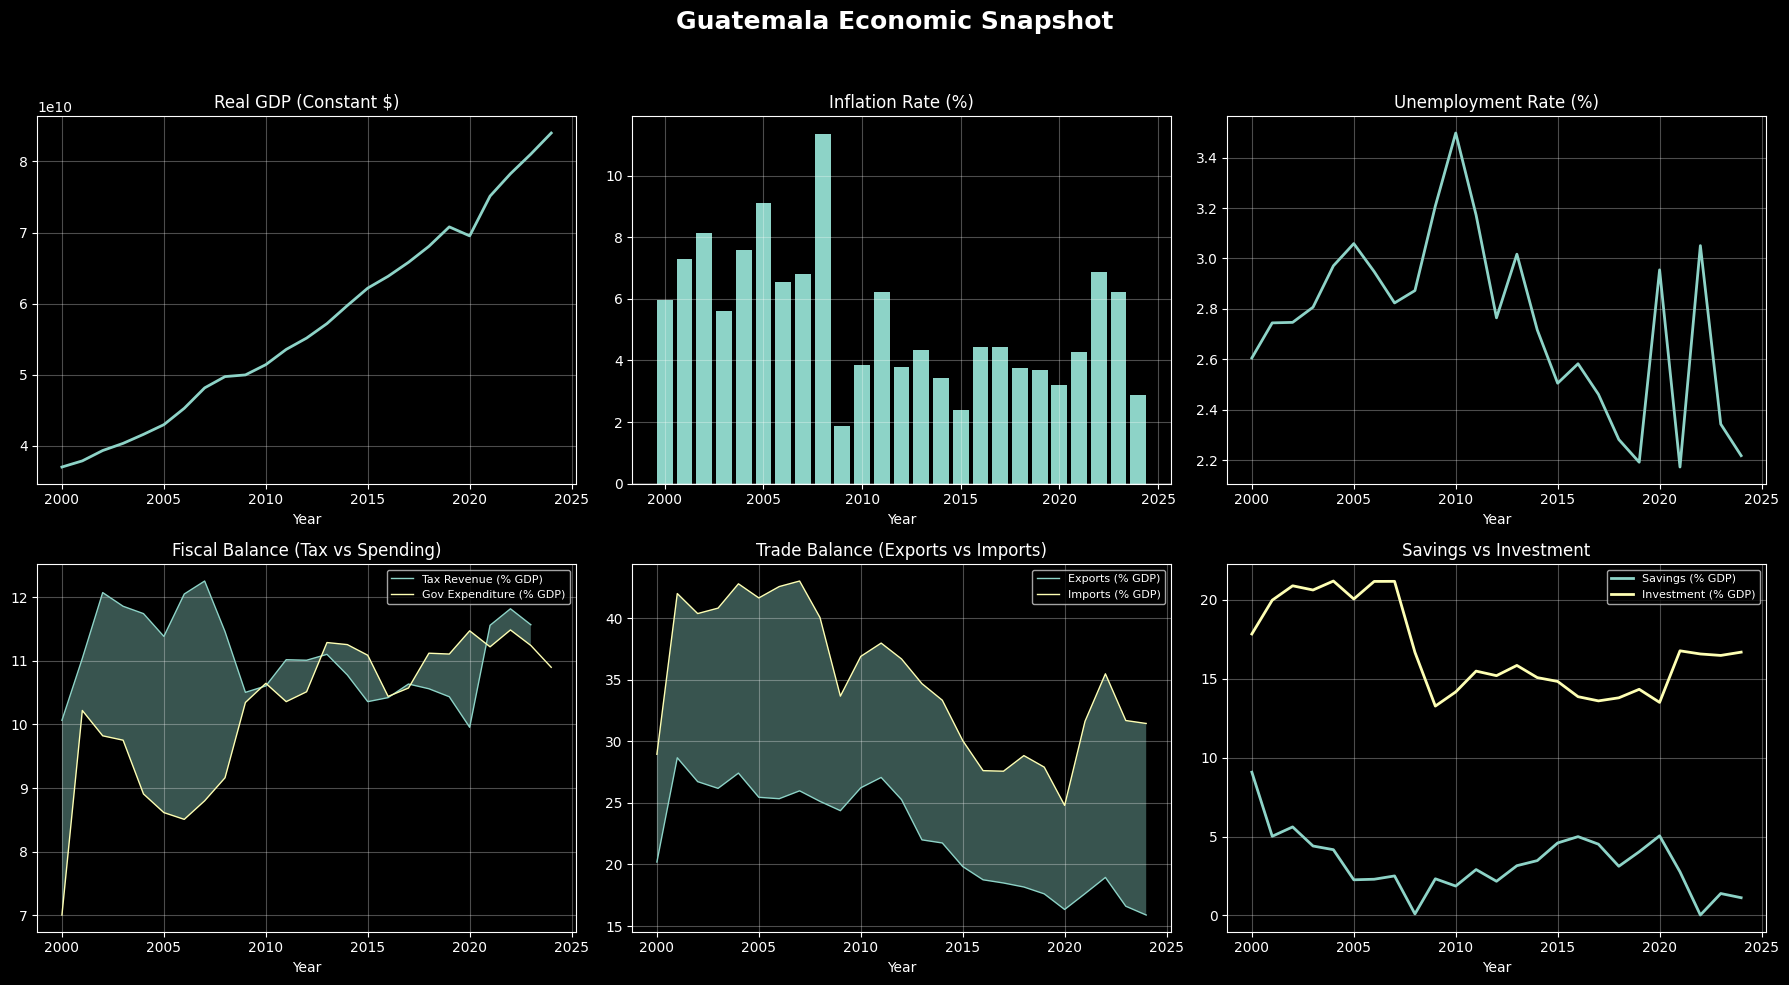

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Guatemala Economic Snapshot", fontsize=18, fontweight="bold")

# 1) Top Left: Real GDP (Line)
axes[0,0].plot(df_gtm.index, df_gtm["GDP_Const"], linewidth=2)
axes[0,0].set_title("Real GDP (Constant $)")
axes[0,0].set_xlabel("Year")
axes[0,0].grid(True, alpha=0.3)

# 2) Top Middle: Inflation (Bar) + 0 line
axes[0,1].bar(df_gtm.index, df_gtm["Inflation_CPI"])
axes[0,1].axhline(0, linewidth=1)
axes[0,1].set_title("Inflation Rate (%)")
axes[0,1].set_xlabel("Year")
axes[0,1].grid(True, alpha=0.3)

# 3) Top Right: Unemployment (Line)
axes[0,2].plot(df_gtm.index, df_gtm["Unemployment_Rate"], linewidth=2)
axes[0,2].set_title("Unemployment Rate (%)")
axes[0,2].set_xlabel("Year")
axes[0,2].grid(True, alpha=0.3)

# 4) Bottom Left: Fiscal Balance (Fill between Tax Rev and Gov Exp)
axes[1,0].fill_between(df_gtm.index, df_gtm["Tax_Rev_GDP"], df_gtm["Gov_Exp_GDP"], alpha=0.4)
axes[1,0].plot(df_gtm.index, df_gtm["Tax_Rev_GDP"], linewidth=1, label="Tax Revenue (% GDP)")
axes[1,0].plot(df_gtm.index, df_gtm["Gov_Exp_GDP"], linewidth=1, label="Gov Expenditure (% GDP)")
axes[1,0].set_title("Fiscal Balance (Tax vs Spending)")
axes[1,0].set_xlabel("Year")
axes[1,0].legend(fontsize=8)
axes[1,0].grid(True, alpha=0.3)

# 5) Bottom Middle: Trade Balance (Fill between Exports and Imports)
axes[1,1].fill_between(df_gtm.index, df_gtm["Exports_GDP"], df_gtm["Imports_GDP"], alpha=0.4)
axes[1,1].plot(df_gtm.index, df_gtm["Exports_GDP"], linewidth=1, label="Exports (% GDP)")
axes[1,1].plot(df_gtm.index, df_gtm["Imports_GDP"], linewidth=1, label="Imports (% GDP)")
axes[1,1].set_title("Trade Balance (Exports vs Imports)")
axes[1,1].set_xlabel("Year")
axes[1,1].legend(fontsize=8)
axes[1,1].grid(True, alpha=0.3)

# 6) Bottom Right: Savings vs Investment (Dual lines)
axes[1,2].plot(df_gtm.index, df_gtm["Gross_Dom_Savings"], linewidth=2, label="Savings (% GDP)")
axes[1,2].plot(df_gtm.index, df_gtm["Gross_Cap_Formation"], linewidth=2, label="Investment (% GDP)")
axes[1,2].set_title("Savings vs Investment")
axes[1,2].set_xlabel("Year")
axes[1,2].legend(fontsize=8)
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
